In [6]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

dd = []

cascPath =  "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

cap = cv2.VideoCapture(0)
inc = 0
maxFrames = 5
dataset = []

while inc < maxFrames:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if  ret==False:
        print("ERROR: No device found")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        #flags=cv2.cv.CV_HAAR_SCALE_IMAGE
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    cv2.imshow('Video', gray)   

    
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        if cv2.waitKey(1) & 0xFF == ord('f'):
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            resized_image = cv2.resize(cv2.imwrite("TEST%04i.jpg" %inc,gray[y:y+h,x:x+w]), (100, 100))
            dataset.append(cv2.resize(gray[y:y+h,x:x+w], (100, 100)))
            #dataset.append(resized_image)
            height, width = resized_image.shape[:2]      
            print(height,width)
            inc+=1           
            
    # Display the resulting frame
    cv2.imshow('Video', gray) 
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  
        
# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()



100 100
100 100
100 100
100 100
100 100


In [7]:
print(type(dataset))
print(len(dataset))
print(dataset)

dd = np.asarray(dataset)
print(dd.shape)
print(dd)

dd=np.reshape(dd,(5,10000))
print(dd.shape)
print(dd)

<class 'list'>
5
[array([[186, 186, 187, ...,  50,  49,  84],
       [187, 188, 189, ...,  40,  51,  31],
       [189, 190, 189, ...,  35,  60,  45],
       ...,
       [125, 122, 120, ..., 163, 164, 163],
       [127, 126, 122, ..., 163, 164, 164],
       [129, 128, 124, ..., 163, 164, 163]], dtype=uint8), array([[ 71,  71,  71, ...,  31,  30,  28],
       [ 72,  72,  72, ...,  29,  29,  28],
       [ 72,  71,  71, ...,  28,  28,  29],
       ...,
       [ 89,  86,  83, ..., 162, 161, 160],
       [ 94,  91,  86, ..., 161, 157, 156],
       [ 99,  95,  89, ..., 156, 155, 152]], dtype=uint8), array([[ 23,  24,  24, ...,  12,  15,  17],
       [ 23,  23,  23, ...,  13,  15,  16],
       [ 23,  22,  23, ...,  12,  13,  16],
       ...,
       [103,  99,  96, ..., 104, 104, 103],
       [106, 102, 100, ..., 104, 104, 104],
       [109, 105, 103, ..., 105, 104, 104]], dtype=uint8), array([[  2,   6,  23, ...,   6,   6,   6],
       [  1,   3,   3, ...,  11,   7,   6],
       [  2,   1,   1

In [8]:
import numpy as np
import pandas as pd

etiq = {0:'YO',1:'Jona',2:'Stef',3:'Harry'}
print(etiq[0])

YO


In [9]:
dela = np.array(pd.read_csv('delaGala.csv',sep=',',header=None))
jona = np.array(pd.read_csv('jonatan.csv', sep=',',header=None))
stef = np.array(pd.read_csv('stefanie.csv',sep=',',header=None))
hary = np.array(pd.read_csv('harry.csv',   sep=',',header=None))

In [10]:
stef=stef[:-4, :]
print(dela.shape)
print(jona.shape)
print(stef.shape)
print(hary.shape)
stef

(100, 10000)
(100, 10000)
(100, 10000)
(100, 10000)


array([[107,  93,  82, ...,   1,   0,   0],
       [108,  82,  85, ...,   0,   0,   0],
       [144, 137, 136, ...,   9,  12,  15],
       ...,
       [112,  98,  89, ...,   5,   4,   2],
       [150, 144, 147, ...,   2,   2,   2],
       [135, 115, 117, ...,   3,   4,   3]])

In [11]:
X = np.concatenate((dela,jona,stef,hary), axis=0)
print(X.shape)

(400, 10000)


In [12]:
y_dela = []
y_jona = []
y_stef = []
y_hary = []

for i in range(0,dela.shape[0]):
   y_dela.append([1,0,0,0])

for i in range(0,jona.shape[0]):
   y_jona.append([0,1,0,0])

for i in range(0,stef.shape[0]):
   y_stef.append([0,0,1,0])

for i in range(0,hary.shape[0]):
   y_hary.append([0,0,0,1])

print(len(y_stef))

y_dela = np.array(y_dela)
y_jona = np.array(y_jona)
y_stef = np.array(y_stef)
y_hary = np.array(y_hary)

y = np.concatenate((y_dela,y_jona,y_stef,y_hary), axis=0)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

100
(400, 4)


In [13]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#from sklearn.metrics import accuracy_score

#clf = RandomForestClassifier(n_estimators=1, max_depth=1,random_state=0)
#clf.fit(X_train, y_train)
#print(clf.feature_importances_)

#prediction = clf.predict(dd)
#print(accuracy_score(y_test, yPred))
#print(prediction)
#predi = np.argmax(prediction, axis=1)
#print(predi)

#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(clf, X_train, y_train, cv=5)
#scores 


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [15]:
# Convolutional Layer 1.
filter_size1 = 10          # filtros 10 x 10 pixels.
num_filters1 = 20         e
#scores = cross_val_score(clf, X_train, y_train, cv=5)
#scores 


# Convolutional Layer 2.
filter_size2 = 10         
num_filters2 = 40         

# Fully-connected layer.
fc_size = 128             

In [16]:
img_size = 100   
img_size_flat = img_size*img_size
img_shape = (img_size,img_size)
num_classes = 4
num_channels = 1  

In [17]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [18]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [19]:
def new_conv_layer(input,              # capa anterior
                   num_input_channels, 
                   filter_size,        
                   num_filters,        
                   use_pooling=True):  # 2x2 max-pooling.

    # Shape de los filtros-pesos para la convolution.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # filtros con shape.
    weights = new_weights(shape=shape)

    # un bias por cada filtro
    biases = new_biases(length=num_filters)

    # Strides
    # siempre 1 para el primero -> image-number 
    # siempre 1 para el ultimo -> the input-channel.
    # los del centro hacen q se mueva cada 1 pixel
    # padding -> size de la salida la misma
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    # achicar imagenes
    if use_pooling:
        # 2x2 max-pooling
        # sacar el mayor valor del 2x2
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # max(x, 0) por cada pixel 
    layer = tf.nn.relu(layer)

    return layer, weights

In [20]:
def flatten_layer(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat, num_features

In [21]:
def new_fc_layer(input,          # capa anterior
                 num_inputs,     
                 num_outputs,    
                 use_relu=True): 

    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    layer = tf.matmul(input, weights) + biases

    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

Placeholder variables


In [22]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

Convolutional Layer 1

In [23]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [24]:
layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 50, 50, 20) dtype=float32>

Convolutional Layer 2

In [25]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [26]:
layer_conv2

<tf.Tensor 'Relu_1:0' shape=(?, 25, 25, 40) dtype=float32>

Flatten Layer

In [27]:
layer_flat, num_features = flatten_layer(layer_conv2)

In [28]:
layer_flat     #25*25*40 layer 2

<tf.Tensor 'Reshape_1:0' shape=(?, 25000) dtype=float32>

In [29]:
num_features

25000

Fully-Connected Layer 1

In [30]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)
layer_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 128) dtype=float32>

Fully-Connected Layer 2

In [31]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)
layer_fc2

<tf.Tensor 'add_3:0' shape=(?, 4) dtype=float32>

Predicted Class

In [32]:
y_pred = tf.nn.softmax(layer_fc2)

y_pred_cls = tf.argmax(y_pred, axis=1)

Cost-function

In [33]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,   ##funcion de costo
                                                        labels=y_true)

cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Optimization Method

In [34]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

Performance Measures

In [35]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

TensorFlow

In [36]:
session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 64
total_iterations = 0

def optimize(num_iterations):
    global total_iterations

    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Batches de entrenamiento
        x_batch = X_train
        y_true_batch = y_train

        # Se ponen en un dict para poder ponerlos en los placeholders
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        session.run(optimizer, feed_dict=feed_dict_train)

        if i % 1 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"
            print(msg.format(i + 1, acc))

    total_iterations += num_iterations

    end_time = time.time()

    time_dif = end_time - start_time

    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [37]:
def plot_confusion_matrix(cls_pred,cls_true):
    # cls_pred : array de las predicccions en el testset

    # cls_true : y verdaderas
    
    # Sklearn.
    cm = confusion_matrix(cls_true, cls_pred)

    print(cm)

    plt.matshow(cm)

    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

In [38]:
test_batch_size = 256

def print_test_accuracy():

    num_test = X_test.shape[0]
    
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    
    cls_true = []
    
    for i in range(0,y_test.shape[0]):
        cls_true.append(np.argmax(y_test[i]))
        
    i = 0

    while i < num_test:
        j = min(i + test_batch_size, num_test)

        images = X_test[i:j, :]
        labels = y_test[i:j, :]

        feed_dict = {x: images, y_true: labels}

        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j


    # si son correctas
    correct = (cls_true == cls_pred)

    correct_sum = correct.sum()

    acc = float(correct_sum) / num_test

    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    print("Confusion Matrix:")
    plot_confusion_matrix(cls_pred,cls_true)

In [39]:
optimize(num_iterations=15)

Optimization Iteration:      1, Training Accuracy:  26.5%
Optimization Iteration:      2, Training Accuracy:  43.3%
Optimization Iteration:      3, Training Accuracy:  43.3%
Optimization Iteration:      4, Training Accuracy:  69.8%
Optimization Iteration:      5, Training Accuracy:  65.3%
Optimization Iteration:      6, Training Accuracy:  67.5%
Optimization Iteration:      7, Training Accuracy:  84.7%
Optimization Iteration:      8, Training Accuracy:  87.3%
Optimization Iteration:      9, Training Accuracy:  82.8%
Optimization Iteration:     10, Training Accuracy:  82.8%
Optimization Iteration:     11, Training Accuracy:  81.7%
Optimization Iteration:     12, Training Accuracy:  86.9%
Optimization Iteration:     13, Training Accuracy:  92.9%
Optimization Iteration:     14, Training Accuracy:  93.7%
Optimization Iteration:     15, Training Accuracy:  94.0%
Time usage: 0:09:22


Accuracy on Test-Set: 97.7% (129 / 132)
Confusion Matrix:
[[38  0  0  1]
 [ 0 30  0  0]
 [ 0  0 30  1]
 [ 1  0  0 31]]


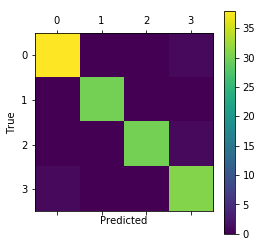

In [40]:
print_test_accuracy()

In [41]:
feed_dict = {x : dd}
predi = session.run([y_pred], feed_dict)
print(predi)

predi = np.asarray(np.hstack(predi))
print(predi.shape)

predi = np.argmax(predi,axis=1)
print(predi)

for i in range(5):
    print(etiq[predi[i]])


[[186 186 187 ... 163 164 163]
 [ 71  71  71 ... 156 155 152]
 [ 23  24  24 ... 105 104 104]
 [  2   6  23 ... 128 129 134]
 [173 172 173 ...  91  87  86]]
[array([[1.0000000e+00, 2.7841025e-23, 0.0000000e+00, 6.1833000e-18],
       [9.9999952e-01, 0.0000000e+00, 4.4811542e-31, 4.5800292e-07],
       [1.0000000e+00, 5.2133318e-36, 0.0000000e+00, 9.7351502e-12],
       [9.9999928e-01, 0.0000000e+00, 7.0730425e-07, 1.9626654e-24],
       [3.2624229e-34, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)]
(5, 4)
[0 0 0 0 3]
YO
YO
YO
YO
Harry
